In [36]:
#standard ds imports
import pandas as pd
import numpy as np

#viualization imports
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, ttest_ind
from sklearn.preprocessing import MinMaxScaler,QuantileTransformer, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier


import wrangle as w 
#remove pink warning box
import warnings
warnings.filterwarnings('ignore')

In [2]:
train,val,test = w.zillow_wrangle()

(1284141, 8) (428047, 8) (428047, 8)


Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284141 entries, 640628 to 1077718
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   propertylandusedesc  1284141 non-null  object 
 1   bedroom              1284141 non-null  int64  
 2   bathroom             1284141 non-null  float64
 3   sqft                 1284141 non-null  int64  
 4   tax_value            1284141 non-null  int64  
 5   yearbuilt            1284141 non-null  int64  
 6   taxamount            1284141 non-null  int64  
 7   county               1284141 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 88.2+ MB


In [49]:
X_train1, X_test1 = train, test
y_train1, y_test1 = train.tax_value , test.tax_value

In [21]:
X_train, X_test = train[['tax_value', 'taxamount']], test[['tax_value', 'taxamount']]
y_train, y_test = train.county , test.county

In [22]:
model = KNeighborsClassifier(10)
# fit the model!
model.fit(X_train, y_train)
# use it!
model.score(X_test, y_test)

0.7754662455291125

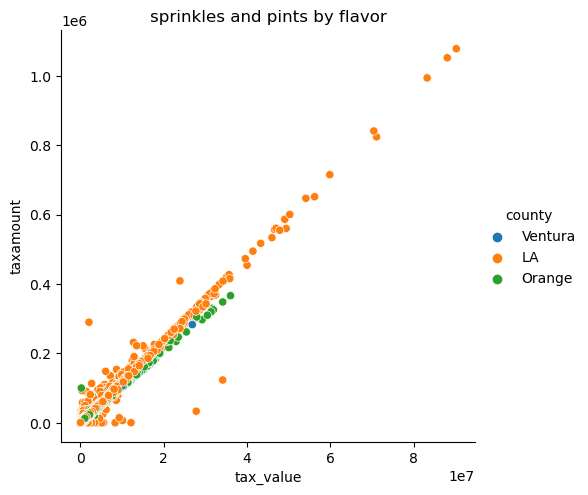

In [25]:
sns.relplot(data=train, x='tax_value',y='taxamount', hue='county')
plt.title('sprinkles and pints by flavor')
plt.show()


Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .
1m

In [17]:
# now with scaling!
scaler = MinMaxScaler()

# for train, on this type of preprocessor,
# we have a fit_transform
# step one: scaler.fit(X_train)
# step two:X_train_scaled = scaler.transform(X_train)
X_train_scaled = scaler.fit_transform(X_train) # together in one step!

X_test_scaled = scaler.transform(X_test)

In [23]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
model.score(X_test_scaled, y_test)

0.7990968281520487

In [32]:
X_train_inverse = scaler.inverse_transform(X_train_scaled)
X_test_inverse = scaler.inverse_transform(X_test_inverse)

In [33]:
model.fit(X_train_inverse, y_train)

KNeighborsClassifier(n_neighbors=10)

In [34]:
model.score(X_test_inverse, y_test)

0.6658147352977594

In [35]:
X_test_inverse

array([[9.32704319e+20, 1.81895841e+15],
       [6.15382478e+20, 1.01815181e+15],
       [3.30238561e+21, 1.21236774e+16],
       ...,
       [4.43471345e+21, 6.88995872e+15],
       [4.55041082e+21, 7.26188631e+15],
       [4.55501464e+21, 9.13430930e+15]])


Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [41]:
quantile_transformer = QuantileTransformer(output_distribution='uniform')

In [45]:
transformed_train = quantile_transformer.fit_transform(X_train_scaled)

In [46]:
transformed_train

array([[0.85779145, 0.82121665],
       [0.80205612, 0.79526585],
       [0.08993639, 0.06818254],
       ...,
       [0.44682339, 0.46789647],
       [0.94346048, 0.94171362],
       [0.04808562, 0.02699928]])

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

(array([[126120., 125508., 137753., 131966., 131173., 123293., 124754.,
         123398., 130574., 129602.],
        [134847., 131436., 122909., 130249., 127358., 127235., 123561.,
         127302., 126094., 133150.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

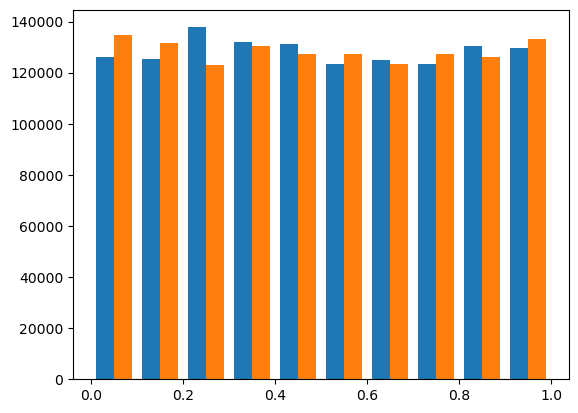

In [47]:
plt.hist(transformed_train)


Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def scale():
    '''this is going to use the MinMaxScaler
    all you need to do it KNN '''
    # now with scaling!
    scaler = MinMaxScaler()

    # for train, on this type of preprocessor,
    # we have a fit_transform
    # step one: scaler.fit(X_train)
    # step two:X_train_scaled = scaler.transform(X_train)
    X_train_scaled = scaler.fit_transform(X_train) # together in one step!

    X_test_scaled = scaler.transform(X_test)
